<a href="https://colab.research.google.com/github/dhanujkumar/ICAT-Academy-Data-Science-and-Analytics-Programme-Assignments/blob/main/Case_Study_on_Testing_of_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study on Testing of Hypothesis**

A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. ● The company needs to check whether there is any dependency between thefeatures “Region” and “Manager”.

Help the company to carry out their study with the help of data provided.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
data = pd.read_csv('/content/Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [5]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


Perform a t-test:

Calculate the mean of "Sales_before_digital_add" and "Sales_After_digital_add" separately

In [6]:
mean_sales_before = data['Sales_before_digital_add(in $)'].mean()
mean_sales_after  = data['Sales_After_digital_add(in $)'].mean()

In [7]:
t_stat, p_value = stats.ttest_rel(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

Analyze the t-test results:

show the t-statistic and p-value.

In [8]:
t_stat

-12.09070525287017

In [9]:
p_value

6.336667004575778e-11

In [10]:
if p_value<0.05 :
  print("reject null hypothesis")
else:
  print("accept null hypothesis") 
     

reject null hypothesis


Analyze the dependency between "Region" and "Manager":

Create a contingency table using the pd.crosstab function to count the occurrence of each combination

In [11]:
contingency_table = pd.crosstab(data['Region'], data['Manager'])

Use the chi2_contingency function from the scipy.stats module to perform the chi-square test

In [12]:
chi2_stat, p_value1, _, _ = stats.chi2_contingency(contingency_table)
     

Interpret the chi-square test results:

Print the chi-square statistic and p-value.



In [13]:
chi2_stat
     

3.050566893424036

In [14]:
p_value1
     

0.5493991051158094

In [15]:
if p_value1<0.05 :
  print("reject null hypothesis")
else:
  print("accept null hypothesis")  
     

accept null hypothesis


Check if there is a dependency between the features

Create a contingency table using the pd.crosstab function to count the occurrences of each combination



In [17]:
contingency_table = pd.crosstab(data['Region'], data['Manager'])
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [18]:
chi2_stat, p_value2, _, _ = stats.chi2_contingency(contingency_table) #--The underscore (_) is used to ignore the other returned values that are not needed in this case.
print("Chi-square statistic:", chi2_stat)
print("p-value2:", p_value)
     

Chi-square statistic: 3.050566893424036
p-value2: 6.336667004575778e-11


In [19]:
if p_value2 <0.05:
  print("Reject Null Hpothesis")
else:
  print("Accept Null Hpothesis")
 
     

Accept Null Hpothesis


Data Visualisation

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

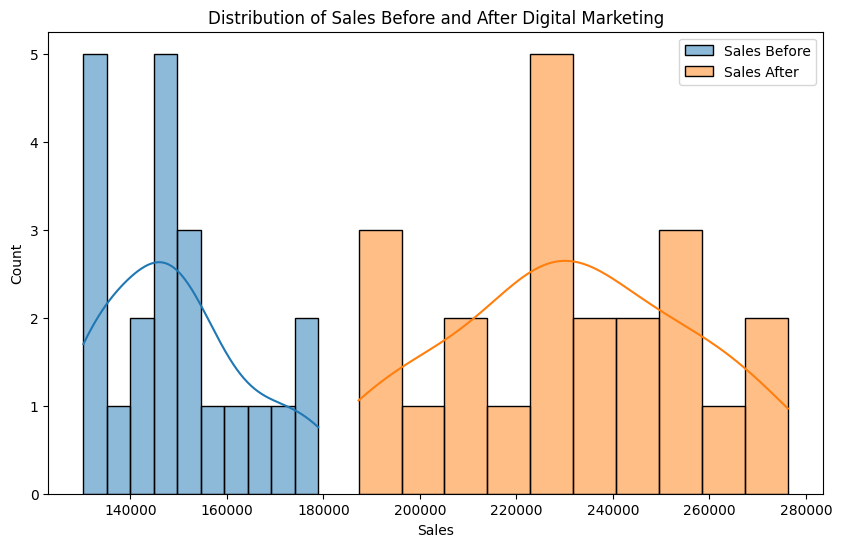

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales_before_digital_add(in $)'], bins=10, kde=True, label='Sales Before')
sns.histplot(data['Sales_After_digital_add(in $)'], bins=10, kde=True, label='Sales After')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales Before and After Digital Marketing')
plt.legend()
plt.show()


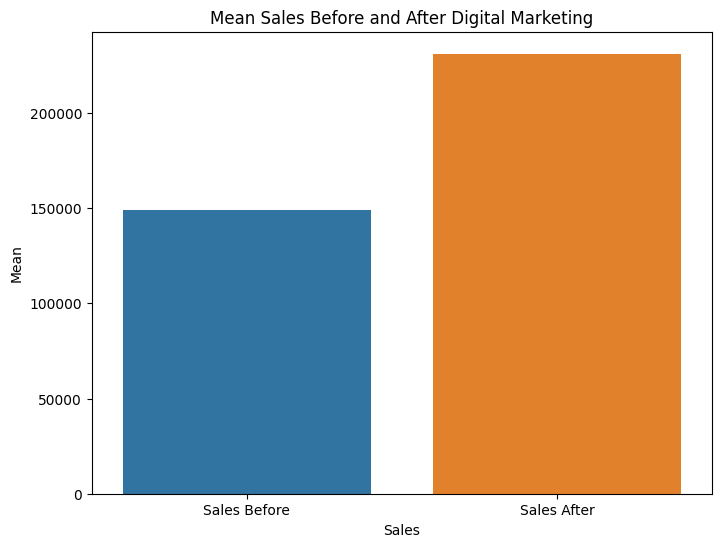

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sales Before', 'Sales After'], y=[mean_sales_before, mean_sales_after])
plt.xlabel('Sales')
plt.ylabel('Mean')
plt.title('Mean Sales Before and After Digital Marketing')
plt.show()

Visualize the dependency between the features "Region" and "Manager"

The values in the heatmap represent the frequency of occurrences of each combination of regions and managers. This visualization provides insights into any potential relationship or dependency between the two features.

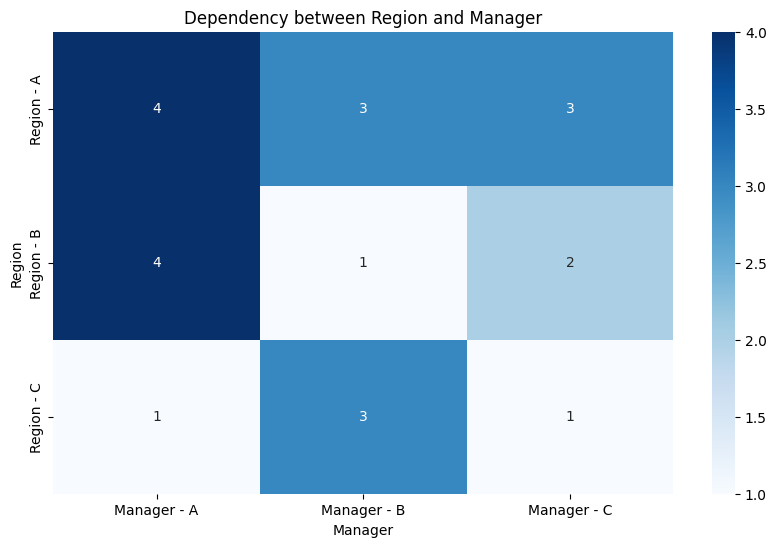

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(data['Region'], data['Manager']), cmap="Blues", annot=True, fmt="d")
plt.xlabel("Manager")
plt.ylabel("Region")
plt.title("Dependency between Region and Manager")
plt.show()